In [1]:
#10. Numerical Navier-Stokes: Primitive Variable Formulation - Part 2 Proffesor Saad Explains

import numpy as np
import matplotlib.pyplot as plt

In [38]:
nx = 32
ny = nx
lx = 1.0
ly = 1.0
dx = lx/(nx-1)
dy = ly/(ny-1)

ν=0.05
Ut = 1.0

dt = min(0.25*dx*dx/ν, 4*ν/Ut/Ut)
#dt = 0.01

In [39]:
# defining operators 
# x partial derivative central differencing approx.
def ddxc(f, dx):
    result = np.zeros_like(f)
    result[1:-1, 1:-1] = (f[1:-1, 2:] - f[1:-1, :-2])/(2.0*dx)
    return result
# y partial derivative central differencing approx.
def ddyc(f, dy):
    result = np.zeros_like(f)
    result[1:-1, 1:-1] = (f[2:, 1:-1] - f[:-2, 1:-1])/(2.0*dy)
    return result
# laplacian operator central differencing approx.
def laplacian(f, dx, dy):
    result = np.zeros_like(f)
    result[1:-1, 1:-1] = (f[1:-1, 2:] - 2*f[1:-1, 1:-1] + f[1:-1, :-2])/dx**2 \
                        + (f[2:, 1:-1] - 2*f[1:-1, 1:-1] + f[:-2, 1:-1])/dy**2
    return result
# divergence operator central differencing approx.
def div(u, v, dx, dy):
    return ddxc(u, dx) + ddyc(v, dy)

# poisson equation solver
def poisson(p, dx, dy, B):
    pn = np.empty_like(p)
    it = 0
    maxit = 50
    err = 1e5
    tol = 1e-3
    while it < maxit and err> tol:
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2.0 + \
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2.0) / \
                          (2.0 * (dx**2.0 + dy**2.0)) - \
                          (dx**2.0 + dy**2.0) / (2.0 * (dx**2.0 + dy**2.0)) * \
                          B[1:-1, 1:-1])
        # boundary conditions
        # dp/dy = 0 at the bottom and side walls            
        p[:, -1] = p[:, -2]
        p[0, :] = p[1, :]
        p[:, 0] = p[:, 1]
        # p = atm at the top wall
        p[:, -1] = 0
        
        err = np.linalg.norm(p-pn, 2)
        it += 1
                        
    return p
    

C:\Users\hugoa\AppData\Local\Temp\ipykernel_86764\3282764109.py:34: RuntimeWarning: overflow encountered in multiply
  uRHS = - ddxc(u*u, dx) - ddyc(v*u, dy) + ν*laplacian(u, dx, dy)
C:\Users\hugoa\AppData\Local\Temp\ipykernel_86764\4086486348.py:5: RuntimeWarning: invalid value encountered in subtract
  result[1:-1, 1:-1] = (f[1:-1, 2:] - f[1:-1, :-2])/(2.0*dx)
C:\Users\hugoa\AppData\Local\Temp\ipykernel_86764\4086486348.py:10: RuntimeWarning: invalid value encountered in subtract
  result[1:-1, 1:-1] = (f[2:, 1:-1] - f[:-2, 1:-1])/(2.0*dy)
C:\Users\hugoa\AppData\Local\Temp\ipykernel_86764\3282764109.py:34: RuntimeWarning: invalid value encountered in subtract
  uRHS = - ddxc(u*u, dx) - ddyc(v*u, dy) + ν*laplacian(u, dx, dy)
C:\Users\hugoa\AppData\Local\Temp\ipykernel_86764\3282764109.py:35: RuntimeWarning: overflow encountered in multiply
  vRHS = - ddxc(u*v, dx) - ddyc(v*v, dy) + ν*laplacian(v, dx, dy)
C:\Users\hugoa\AppData\Local\Temp\ipykernel_86764\3282764109.py:35: RuntimeWarnin

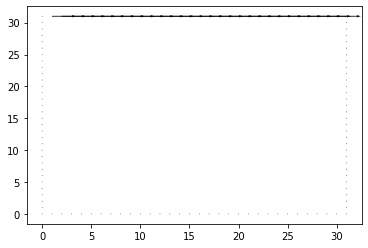

In [40]:
u = np.zeros([ny, nx])
v = np.zeros([ny, nx])
uh = np.zeros([ny, nx])
vh = np.zeros([ny, nx])
p = np.zeros([ny, nx])

t = 0
tend = 40*dt


while t < tend:
    # set boundary conditions
    # bottom wall
    u[0, :] = 0
    v[0, :] = 0
    # top wall
    u[-1, :] = Ut
    v[-1, :] = 0
    # left wall
    u[:, 0] = 0
    v[:, 0] = 0
    # right wall
    u[:, -1] = 0
    v[:, -1] = 0
    
    
#    u[int(ny/2-2):int(ny/2+2), int(nx/2-2):int(nx/2+2)]= \
#    np.zeros_like(u[int(ny/2-2):int(ny/2+2), int(nx/2-2):int(nx/2+2)])
#    v[int(ny/2-2):int(ny/2+2), int(nx/2-2):int(nx/2+2)]= \
#    np.zeros_like(v[int(ny/2-2):int(ny/2+2), int(nx/2-2):int(nx/2+2)])
    
    
    # computing RHS x momentum equation
    uRHS = - ddxc(u*u, dx) - ddyc(v*u, dy) + ν*laplacian(u, dx, dy)
    vRHS = - ddxc(u*v, dx) - ddyc(v*v, dy) + ν*laplacian(v, dx, dy)
    
    uh = u - dt*uRHS
    vh = v - dt*vRHS
    
    pRHS = div(uh, vh, dx, dy)/dt #+ div(uRHS, vRHS, dx, dy)
    p = poisson(p, dx, dy, pRHS)
    
    u = uh + dt*ddxc(p, dx)
    v = vh + dt* ddyc(p, dy)
    
    
    t += dt
    
plt.quiver(u, v)